# Execute the code below

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)


# You have now a DataFrame with lots of weather data

In [ ]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,1037,62.250,9,6,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,1040,58.125,8,6,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,1040,37.000,6,1,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,1040,42.625,5,1,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,1040,17.250,6,2,-2,143,116,116,0,1,8.7,very bad,1,5


# Now, complete the following tasks :

## First of all, you have to create a scatterplot with max (in red) and min (in blue) temperatures located on the same graph

There are lots of colors to chose from here : https://python-graph-gallery.com/100-calling-a-color-with-seaborn/

Create a scatterplot :
- with max (in red) and min (in blue) temperatures on the same graph
- Y-axis for temperatures
- X-axis for dates
- Include legend, readable axis ticks, and title

Here is an example of what is expected :

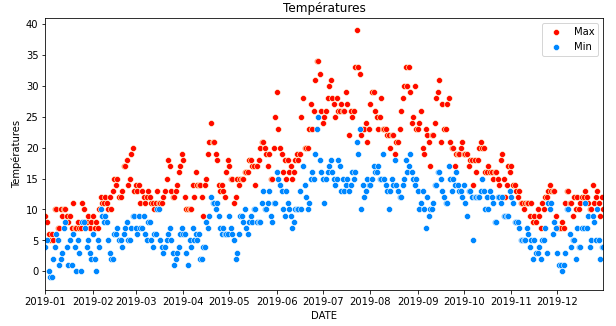


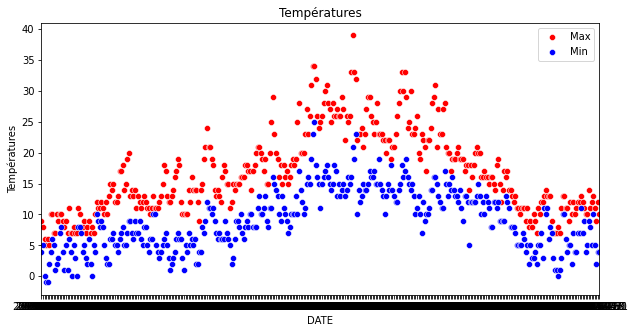

In [ ]:
# Of course, you'll add legend, readable axis ticks, and title (there is no seaborn function for that, use matplotlib syntax)
# It's up to you:

fig = plt.figure(figsize = (10, 5))

ax = fig.add_subplot(111)

sns.scatterplot(data = df_weather, x = "DATE", y = "MAX_TEMPERATURE_C", color = 'red', label = 'Max') 
sns.scatterplot(data = df_weather, x = "DATE", y = "MIN_TEMPERATURE_C", color = 'blue', label = 'Min') 

ax.set_title("Températures")
plt.ylabel("Températures")
plt.xlabel("DATE")
ax.margins(x = 0)

plt.show()

## Colorize with hue argument, to show the criterias of the opinion columns

With Seaborn, you can use the "data" argument to indicate your DataFrame, syntax will be prettier.

Here is an example of what is expected :

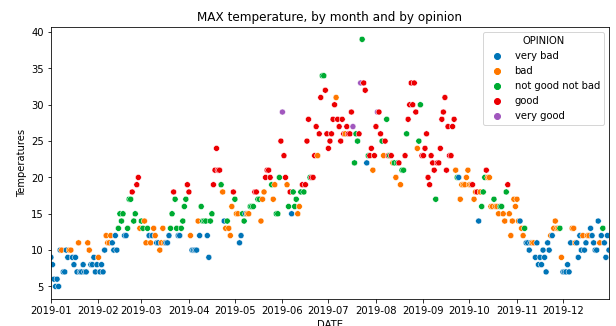

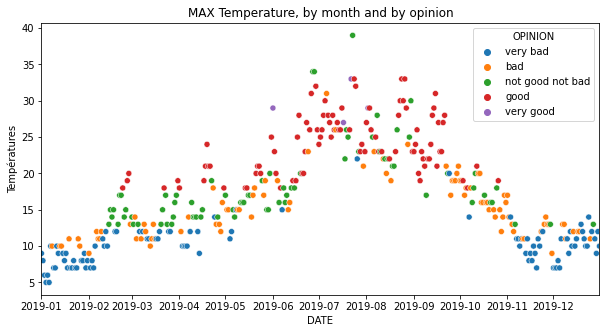

In [ ]:
# Of course, you'll add legend, readable axis ticks, and title (there is no seaborn function for that, use matplotlib syntax)
# It's up to you:

df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

ax, fig = plt.subplots(figsize = (10, 5))

sns.scatterplot(data = df_weather,
                x = "DATE", 
                y = "MAX_TEMPERATURE_C", 
                hue = "OPINION")

plt.title("MAX Temperature, by month and by opinion")
plt.ylabel("Températures")
plt.xlabel("DATE")
plt.margins(x = 0)

plt.show()


## Correlation coefficient and heatmap - change the palette and interpretation

For more information : https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/





What does it mean ? Could you interpret this ? Why the diagonal value is `1` ? And why there is a blank column and a blank row ?

Could you find the less correlated columns ? Be careful : the less correlated columns are those with a correlated coefficient close to 0, not -1.

Let's modify it to be more readable.
Please change the palette (`cmap`) to a more beautiful one. Chose a "diverging" palette in this page https://seaborn.pydata.org/tutorial/color_palettes.html and `center` it on 0.



Here is an example of what is expected (but you can improve colors) :

![ ](https://storage.googleapis.com/quest_editor_uploads/Ci9AZJdBsnuTx7z8XuZRTbvoCi3uON5r.png)

Then, please add a title of course.

Try to interpret it : which columns are most correlated with MAX Temperature ? Positively and negatively ? Do you think it's logical ?

In [ ]:
# It's your turn now :

df_weather.corr()

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,MONTH,DAY
MAX_TEMPERATURE_C,1.000000,0.876892,-0.114510,0.825536,0.975441,0.976796,-0.210704,-0.702905,0.102422,-0.004506,-0.457853,0.993324,0.826719,0.941037,-0.190506,-0.191807,-0.301603,NaN,0.404340,0.690323,0.196215,0.123811
MIN_TEMPERATURE_C,0.876892,1.000000,0.116357,0.950702,0.888389,0.850258,-0.023004,-0.526656,-0.013555,-0.185420,-0.130853,0.880895,0.875856,0.946671,0.014212,0.057358,-0.139955,NaN,0.379809,0.471559,0.283569,0.120233
WINDSPEED_MAX_KMH,-0.114510,0.116357,1.000000,0.189827,-0.053186,-0.121643,0.394238,0.007739,-0.041671,-0.376733,0.387952,-0.110249,0.056339,-0.000797,0.325675,0.423772,0.281717,NaN,-0.042091,-0.226626,0.169456,-0.083761
TEMPERATURE_MORNING_C,0.825536,0.950702,0.189827,1.000000,0.874102,0.814347,0.048650,-0.455566,-0.020284,-0.250654,-0.039091,0.824918,0.882306,0.924278,0.099342,0.132621,-0.096331,NaN,0.343759,0.407663,0.343293,0.121388
TEMPERATURE_NOON_C,0.975441,0.888389,-0.053186,0.874102,1.000000,0.973353,-0.175838,-0.673392,0.083209,-0.060409,-0.375154,0.963276,0.841095,0.953704,-0.146048,-0.144571,-0.235171,NaN,0.408798,0.657113,0.213586,0.112144
TEMPERATURE_EVENING_C,0.976796,0.850258,-0.121643,0.814347,0.973353,1.000000,-0.209041,-0.676409,0.096888,0.004110,-0.429395,0.963253,0.807732,0.912310,-0.196340,-0.186346,-0.294992,NaN,0.398019,0.678705,0.170397,0.124853
PRECIP_TOTAL_DAY_MM,-0.210704,-0.023004,0.394238,0.048650,-0.175838,-0.209041,1.000000,0.265536,-0.172711,-0.468712,0.456302,-0.206429,-0.003174,-0.111031,0.411905,0.513442,0.372366,NaN,-0.113279,-0.349541,0.133670,-0.038824
HUMIDITY_MAX_PERCENT,-0.702905,-0.526656,0.007739,-0.455566,-0.673392,-0.676409,0.265536,1.000000,-0.210210,-0.009099,0.541100,-0.692777,-0.344208,-0.613490,0.210244,0.283311,0.286082,NaN,-0.380635,-0.627440,-0.151859,-0.016809
VISIBILITY_AVG_KM,0.102422,-0.013555,-0.041671,-0.020284,0.083209,0.096888,-0.172711,-0.210210,1.000000,0.140802,-0.331651,0.096070,-0.018760,0.031536,-0.158440,-0.176006,-0.139516,NaN,-0.035014,0.295531,-0.124253,0.050955
PRESSURE_MAX_MB,-0.004506,-0.185420,-0.376733,-0.250654,-0.060409,0.004110,-0.468712,-0.009099,0.140802,1.000000,-0.444519,-0.003728,-0.141155,-0.129409,-0.410147,-0.438912,-0.392729,NaN,-0.017744,0.216754,-0.347326,0.012966


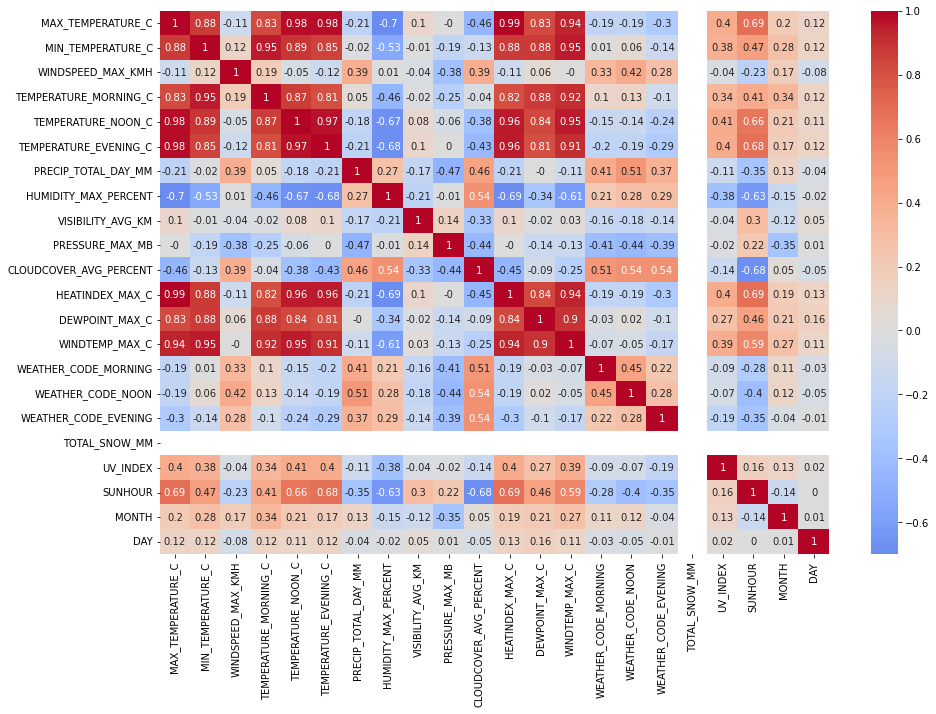

In [ ]:
plt.figure(figsize = (15, 10))

sns.heatmap(round(df_weather.corr(), 2), annot = True, cmap = 'coolwarm', center = 0)

plt.show()

##### On a ici une palette divergente centrée sur 0. Les colonnes peu corrélées sont en blanc/gris et les colonnes corrélées négativement sont en rose. 

La valeur en diagonale est égale à 1 car on y trouve des données corrélées avec elles-mêmes (ex : Month et Month).

La colonne est blanche sur le critère TOTAL_SNOW_MM car il y a des NaN.

Les indicateurs les moins corrélées sont liées à l'humidité. Plus les tempratures sont élevées, moins il y a d'humidité.


## Pair Plot - Colorize the opinions
Another way, and more visual way, to see correlation, is just to plot each column 2 by 2, that's a pairplot. But it's slow to compute on the whole dataset.

- Creates a slice of 10 columns (including the "OPINION" column)
- Creates a sample of this slice
- Draw a Pairplot on this sample, and colorize it by `OPINION`

In [ ]:
# It's your turn:

slice_columns = df_weather.iloc[: , -10 : ]
slice_columns.head()

,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,3,116,143,176,0,1,5.1,very bad,1,1
1,3,119,116,116,0,1,8.7,very bad,1,2
2,-4,116,116,116,0,1,8.7,very bad,1,3
3,-4,116,116,122,0,1,5.1,very bad,1,4
4,-2,143,116,116,0,1,8.7,very bad,1,5


In [ ]:
sample = slice_columns.sample(frac = 0.5, replace = False, random_state = 1)
sample.head()

,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
354,6,116,116,302,0,1,6.9,very bad,12,21
185,23,116,116,116,0,1,15.9,good,7,5
167,18,116,116,116,0,1,16.0,good,6,17
175,21,143,116,116,0,1,16.0,good,6,25
314,7,116,293,116,0,1,5.2,bad,11,11


<Figure size 1440x1080 with 0 Axes>

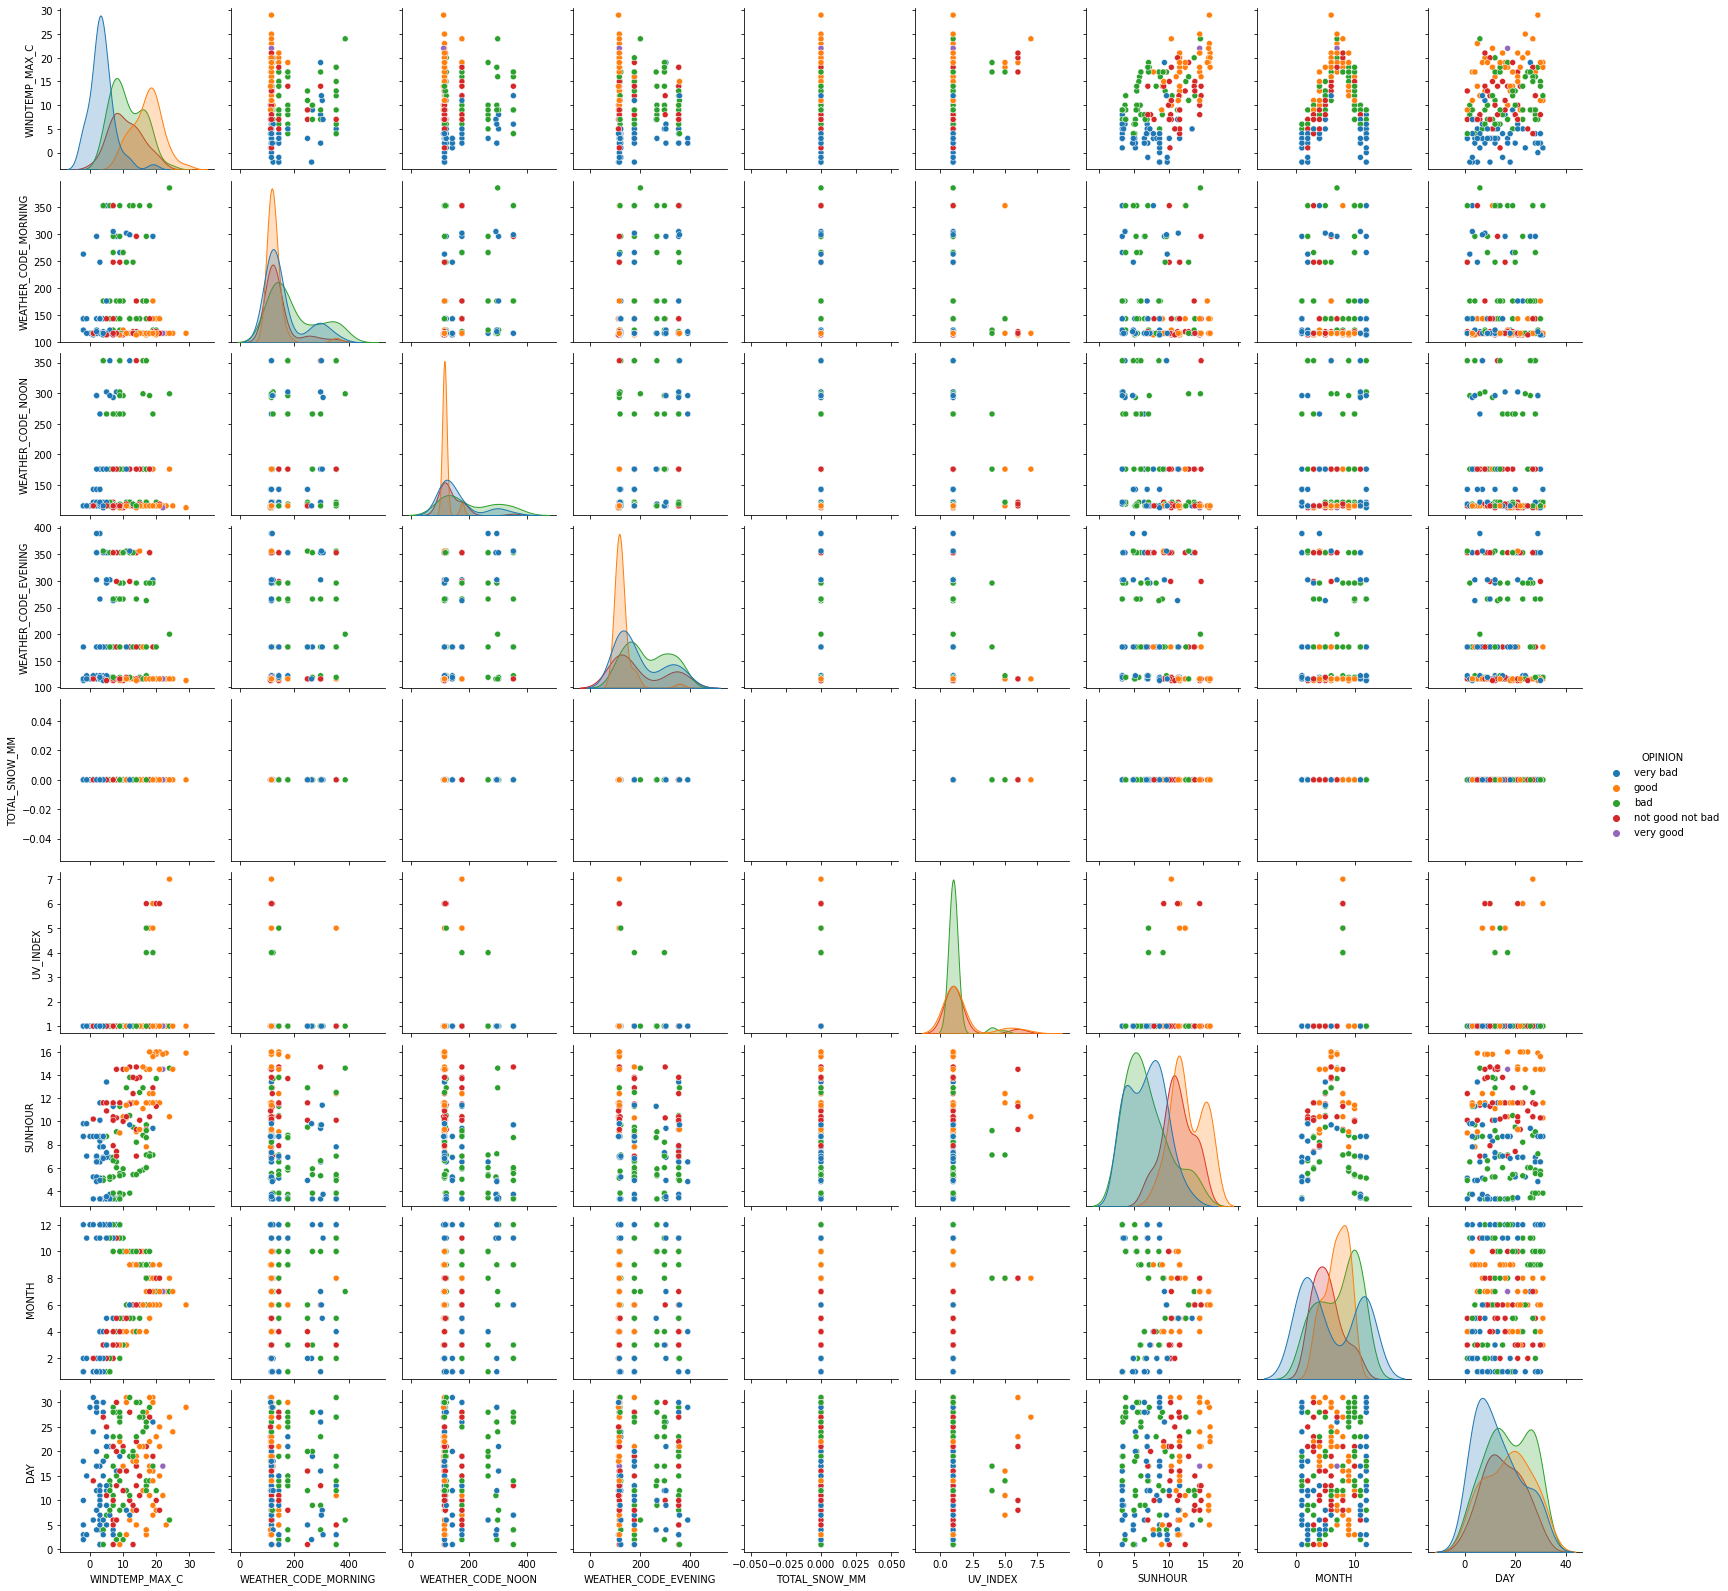

In [ ]:
# Draw a Pairplot on this sample, and colorize it by OPINION
plt.figure(figsize = (20, 15))
sns.pairplot(data = sample, hue ='OPINION', palette = sns.color_palette("tab10", 5))

plt.show()

## Linear regression

With `regplot`, you can plot a regresion line. It's very simple, but here, it's not very adapted, because our 2 columns seems not correlated. But you know lots of correlated columns with MAX Temperature.
Replace the X-axis with a positively correlated columns, then plot another regplot with a negative correlation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


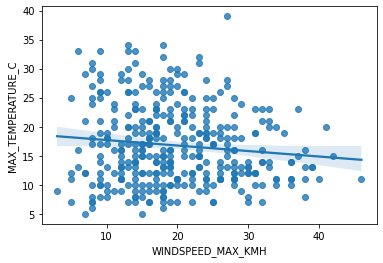

In [ ]:

sns.regplot('WINDSPEED_MAX_KMH', 'MAX_TEMPERATURE_C', data = df_weather)
plt.show()


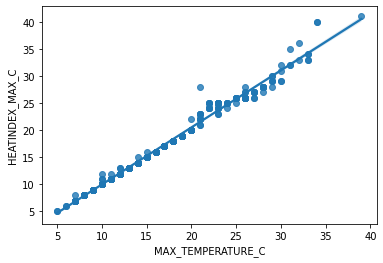

In [ ]:
# Display a regplot with a positive correlation:

sns.regplot(x ='MAX_TEMPERATURE_C', y ='HEATINDEX_MAX_C', data = df_weather)
plt.show()

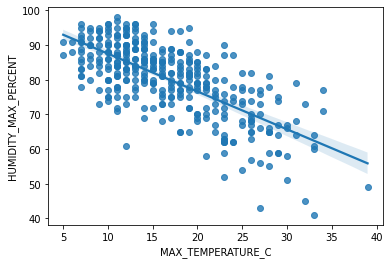

In [ ]:
# Display a regplot with a negative correlation:

sns.regplot(x ='MAX_TEMPERATURE_C', y ='HUMIDITY_MAX_PERCENT', data = df_weather)
plt.show()

# More and more...
Draw 4 different charts of your choice on the same dashboard. You're an analyst, you have to be force of proposal. Your goal here is to represent which season has the best weather.

Remember, a MatPlotLib "figure" is like a dashboard including subplots. So you have to create a MatPlotLib figure with subplots. And these subplots will be Seaborn's charts.

In [ ]:
# Your code here

# Ajout d'une colonne 'SEASON'
df_weather['SEASON'] = df_weather["DATE"]

# Découpage par trimestres
tri1 = df_weather[(df_weather['DATE'] > '2019-01-01') & (df_weather['DATE'] < '2019-03-20')]
tri2 = df_weather[(df_weather['DATE'] > '2019-03-21') & (df_weather['DATE'] < '2019-06-21')]
tri3 = df_weather[(df_weather['DATE'] > '2019-06-22') & (df_weather['DATE'] < '2019-09-23')]
tri4 = df_weather[(df_weather['DATE'] > '2019-09-24') & (df_weather['DATE'] < '2019-12-31')]

# Moyenne des précipitations par trimestres :

T1 = tri1.PRECIP_TOTAL_DAY_MM.mean()
T2 = tri2.PRECIP_TOTAL_DAY_MM.mean()
T3 = tri3.PRECIP_TOTAL_DAY_MM.mean()
T4 = tri4.PRECIP_TOTAL_DAY_MM.mean()

precip_means = {"Winter" : T1, "Spring": T2, "Summer" : T3, "Autumn": T4}

In [ ]:
df_weather['SEASON'].value_counts().sum()

365

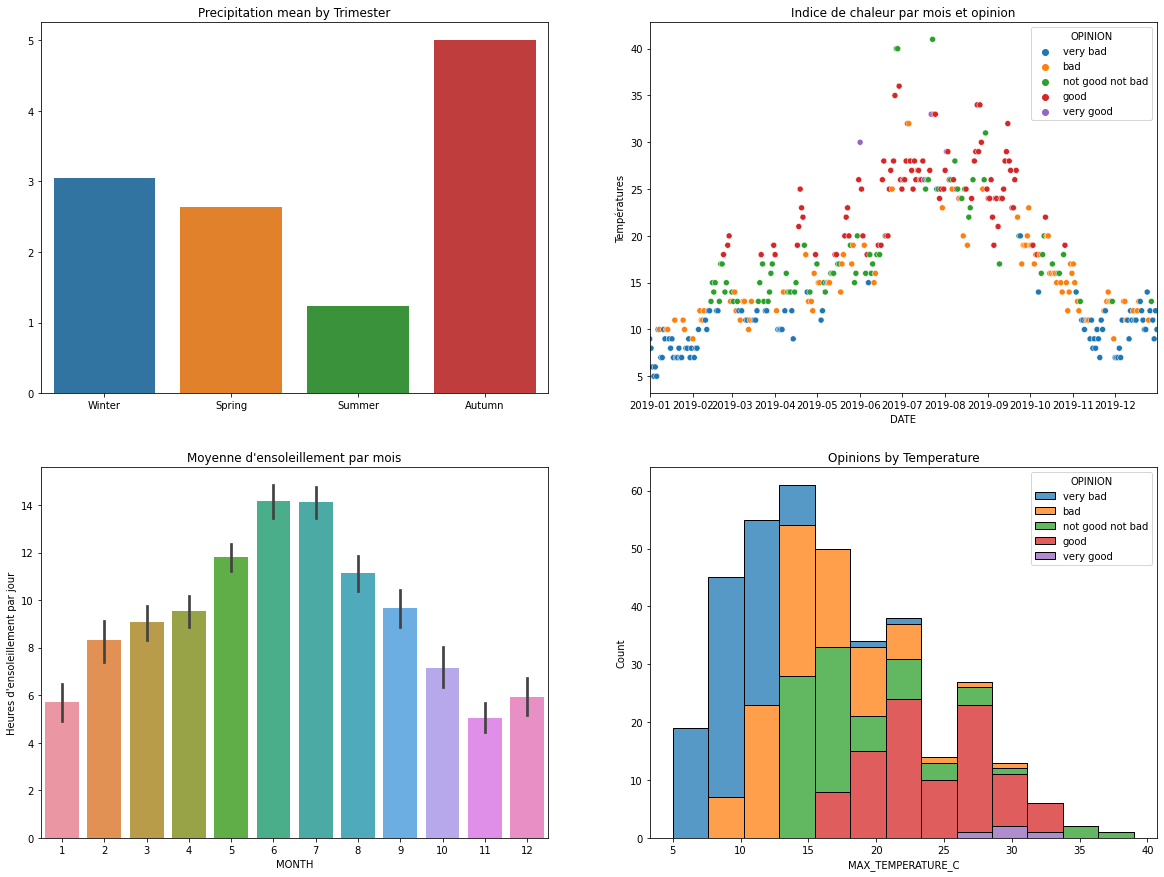

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (20, 15))

df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

# Bar plot precipitations par trimestres :

ax1 = plt.subplot(221)
keys = list(precip_means.keys())
vals = list(precip_means.values())
sns.barplot(x = keys, y = vals)
ax1.set_title("Precipitation mean by Trimester")

# Scatterplot Indice de chaleur par mois et opinion :
ax2 = plt.subplot(222)
sns.scatterplot(data = df_weather, x = "DATE", y = "HEATINDEX_MAX_C", hue = "OPINION")
ax2.set_title("Indice de chaleur par mois et opinion")
ax2.set_ylabel("Températures")
ax2.margins(x = 0)

# Bar plot Moyenne d'ensoleillement par mois :
ax3 = plt.subplot(223)      
sns.barplot(data = df_weather, x = "MONTH", y = "SUNHOUR")
ax3.set_title("Moyenne d'ensoleillement par mois")
ax3.set_ylabel("Heures d'ensoleillement par jour")

# Histogramme Opinions par températures :

ax4 = plt.subplot(224) 
ax4 = sns.histplot(data = df_weather, x = 'MAX_TEMPERATURE_C', hue = "OPINION",multiple = "stack")
ax4.set_title("Opinions by Temperature")

plt.show()

#### Les températures sont les plus élevées en été, l'indice de chaleur aussi, l'ensoleillement est au plus haut et les précipitations sont les plus basses. Plus les températures sont élevées, plus l'opinion l'est aussi.



# Is it summer? It seems appropriate. :) 